In [1]:
import tensorflow
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


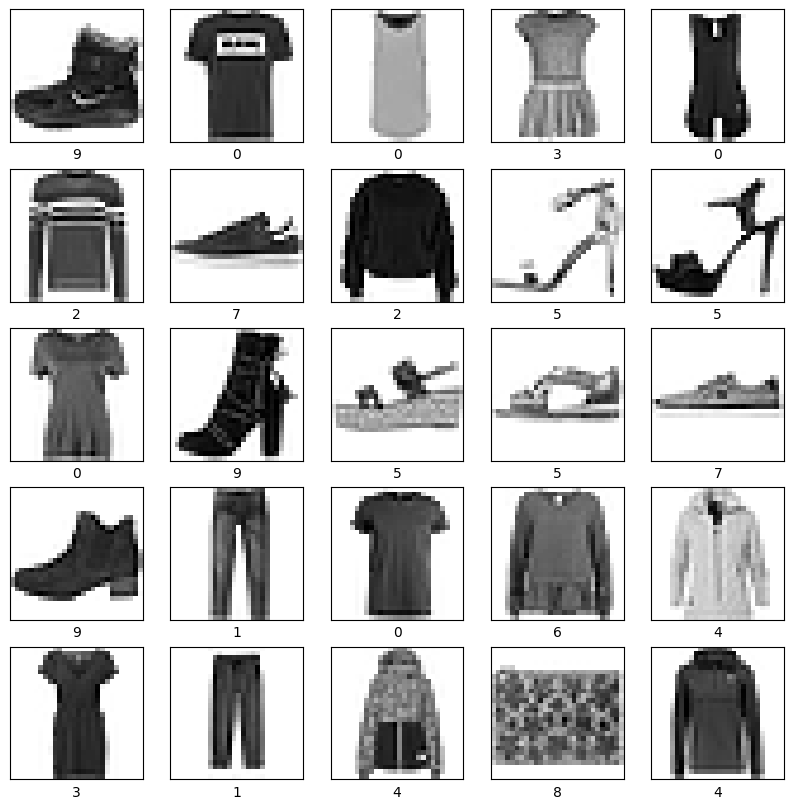

In [2]:
mnist = tensorflow.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(str(y_train[i]))
plt.show()

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units= 128, activation='relu'),
    Dense(units= 64, activation='relu'),
    Dense(units= 32, activation='relu'),
    Dense(units= 10, activation='softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 14s 3ms/step - loss: 0.5146 - accuracy: 0.8152
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3715 - accuracy: 0.8641
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3392 - accuracy: 0.8751
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3133 - accuracy: 0.8833
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2970 - accuracy: 0.8895
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2812 - accuracy: 0.8949
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2697 - accuracy: 0.8988
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9031
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2484 - accuracy: 0.9065
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

313/313 [==============================] - 1s 2ms/step


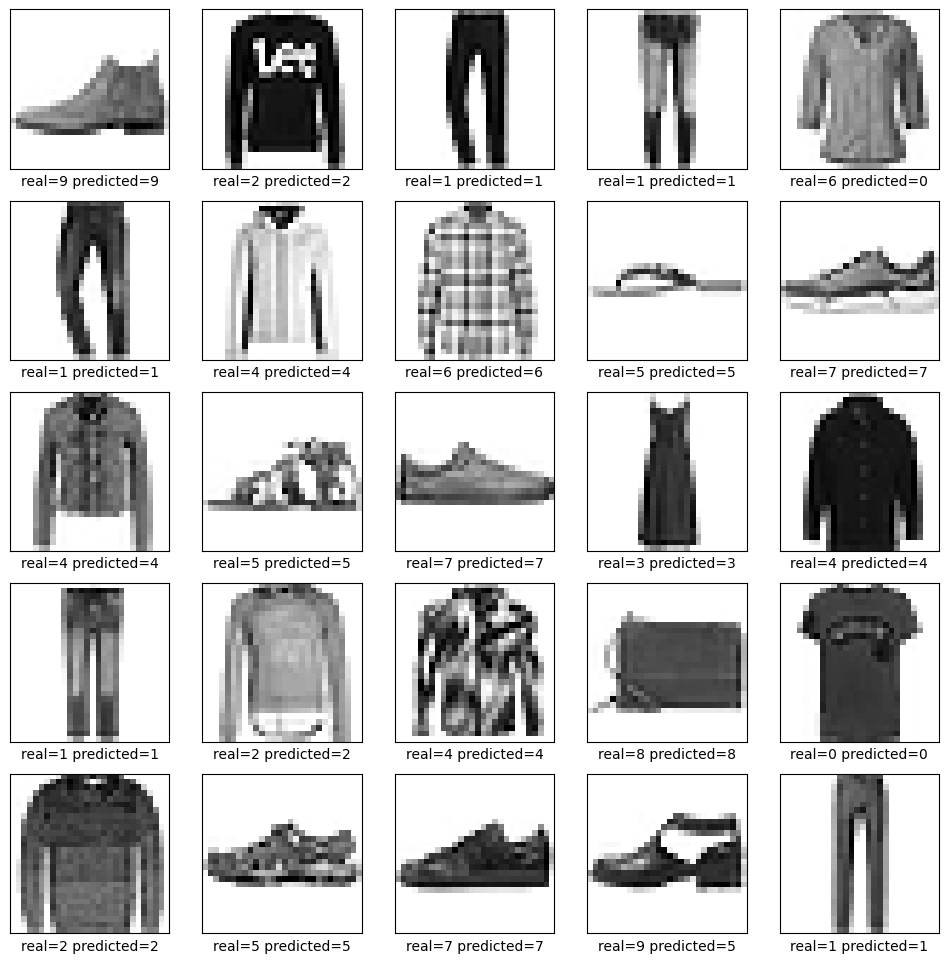

In [5]:
predict = model.predict(x_test)
plt.figure(figsize=(12, 12))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel('real=' + str(y_test[i]) + ' predicted=' + str(np.argmax(predict[i])))
plt.show()

In [6]:
out = model.evaluate(x_test, y_test)

print("Model Accuracy: %.4f" %out[1])
print("Model loss: %.4f" %out[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.3617 - accuracy: 0.8915
Model Accuracy: 0.8915
Model loss: 0.3617
